In [1]:
import numpy as np
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import wordcloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
nlp=spacy.load('en_core_web_sm')
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [3]:
df=pd.read_csv('Elon_musk.csv',encoding='cp1252')
df

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
len(df)

1999

In [5]:
df.Text

0                                  @kunalb11 I’m an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

# Text Perprocessing

In [6]:
df_2 = [x.strip() for x in df['Text'] if x.strip()]
df_2[:10]


['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [7]:
# Removing Punctuation

import re # re for Regular Expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    return text
clean = lambda x: clean_text(x)

In [8]:
df['text'] = df.Text.apply(clean)

In [9]:
df['text']

0                                     kunalb  im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                           gtera  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                             progress update august  
Name: text, Length: 1999, dtype: object

In [10]:
df

,Unnamed: 0,Text,text
0,1,@kunalb11 I’m an alien,kunalb im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china for amazin...
...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",flcnhvy true it sounds so surreal but the nega...
1995,1996,@PPathole Make sure to read ur terms &amp; con...,ppathole make sure to read ur terms amp condit...
1996,1997,@TeslaGong @PPathole Samwise Gamgee,teslagong ppathole samwise gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,ppathole altho dumb and dumber is


In [13]:
# Stop word removal

stop_word=pd.read_csv('stop.txt',header=None)

In [14]:
st_word = [i for i in stop_word[0]]

In [15]:
import nltk
from nltk.corpus import stopwords
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='nltk')

nltk.download('stopwords', quiet=True)


True

In [16]:
stop= stopwords.words('english')
my_stop_words= stop.copy()

# Adding more stop words
for i in st_word:
    my_stop_words.append(i)
print(len(my_stop_words))
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in my_stop_words))

750


## Sentiment Analysis

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [18]:
sid = SentimentIntensityAnalyzer()

def sentiment_scores(text):

    sentiment_dict = sid.polarity_scores(text)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Sentence Overall Rated As", end = " ")

    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")

    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")

    else :
        print("Neutral")

In [19]:
x = SentimentIntensityAnalyzer().polarity_scores(df['text'][2])

In [20]:
x = SentimentIntensityAnalyzer().polarity_scores(df['text'][4])
df['text'][4]

'teslacn congratulations tesla china amazing execution year'

In [21]:
x

{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'compound': 0.8271}

In [22]:
# Adding all the scores in the form of column i.e neg,neu,pos,compound

df['Scores']=df['text'].apply(lambda text: sid.polarity_scores(text))
df.head()

,Unnamed: 0,Text,text,Scores
0,1,@kunalb11 I’m an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp..."
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp..."


In [23]:
df['compound']=df['Scores'].apply(lambda score_dict: score_dict['compound'])
df.head()

,Unnamed: 0,Text,text,Scores,compound
0,1,@kunalb11 I’m an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271


In [24]:
df['neg']=df['Scores'].apply(lambda score_dict: score_dict['neg'])
df.head()

,Unnamed: 0,Text,text,Scores,compound,neg
0,1,@kunalb11 I’m an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,0.000
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,0.512
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271,0.000


In [25]:
df['pos']=df['Scores'].apply(lambda score_dict: score_dict['pos'])
df.head()

,Unnamed: 0,Text,text,Scores,compound,neg,pos
0,1,@kunalb11 I’m an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,0.000,0.577
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,0.512,0.000
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271,0.000,0.606


In [26]:
df['neu']=df['Scores'].apply(lambda score_dict: score_dict['neu'])
df.head()

,Unnamed: 0,Text,text,Scores,compound,neg,pos,neu
0,1,@kunalb11 I’m an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,0.000,0.577,0.423
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,0.512,0.000,0.488
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271,0.000,0.606,0.394


In [27]:
df['compound_score']=df['compound'].apply(lambda c: 'pos' if c >= 0 else 'neg')
df.head()

,Unnamed: 0,Text,text,Scores,compound,neg,pos,neu,compound_score
0,1,@kunalb11 I’m an alien,kunalb im alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextlevel,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,0.000,0.577,0.423,pos
3,4,@gtera27 Doge is underestimated,gtera doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,0.512,0.000,0.488,neg
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...,"{'neg': 0.0, 'neu': 0.394, 'pos': 0.606, 'comp...",0.8271,0.000,0.606,0.394,pos


In [28]:
df['neg'].value_counts()

0.000    1734
0.231       6
0.252       5
0.247       5
0.097       5
         ... 
0.206       1
0.090       1
0.605       1
0.397       1
0.220       1
Name: neg, Length: 172, dtype: int64

In [29]:
df['pos'].value_counts()

0.000    1277
0.375      16
0.672      14
0.412      12
0.600      11
         ... 
0.649       1
0.238       1
0.341       1
0.709       1
0.317       1
Name: pos, Length: 309, dtype: int64

In [30]:
df['compound'].value_counts()

 0.0000    1114
 0.6249      54
 0.4588      49
 0.4215      46
 0.4404      42
           ... 
 0.7891       1
-0.4912       1
 0.7269       1
 0.8155       1
-0.7351       1
Name: compound, Length: 141, dtype: int64

In [31]:
df['neu'].value_counts()

1.000    1106
0.625      19
0.588      17
0.328      14
0.833      12
         ... 
0.654       1
0.524       1
0.522       1
0.808       1
0.380       1
Name: neu, Length: 330, dtype: int64

## Tokenization

In [32]:
text_3_alternative = ' '.join(x.strip() for x in df['text'] if x.strip())
length_alternative = len(text_3_alternative)


In [33]:
import nltk
from nltk.tokenize import word_tokenize
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='nltk')

nltk.download('punkt', quiet=True)

df_token = word_tokenize(text_3_alternative)
print(df_token)


['kunalb', 'im', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'year', 'happy', 'year', 'ox', 'httpstco', 'wfkmyu', 'oj', 'frodo', 'underdogeall', 'thought', 'failhimself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx', 'haha', 'flcnhvy', 'anonyx', 'tweets', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'givedirectly', 'agree', 'clubhouse', 'kanyewest', 'httpstco', 'rwe', 'uhsts', 'geoffkeighley', 'unrealengine', 'real', 'bought', 'dogecoin', 'lil', 'toddler', 'hodler', 'joshmanmode', 'issues', 'sentencing', 'bit', 'high', 'freewalletorg', 'fixing', 'freewalletorg', 'unlock', 'account', 'astrojordy', 'true', 'power', 'haha', 'httpstcofc', 'uhqsd', 'freewalletorg', 'crypto', 'wallet', 'wont', 'give', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'app', 'sucks',

## Normalisation

In [34]:
lower_words = [x.lower() for x in df_token]
print(lower_words[0:25])

['kunalb', 'im', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'year', 'happy', 'year']


## Stemming

In [35]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb', 'im', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'year', 'happi', 'year', 'ox', 'httpstco', 'wfkmyu', 'oj', 'frodo', 'underdogeal', 'thought', 'failhimself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx', 'haha', 'flcnhvi', 'anonyx']


## Stop Word Removal

In [36]:
no_stop_stemmed= [word for word in stemmed_tokens if not word in my_stop_words]

In [37]:
print(len(stemmed_tokens))
print(len(no_stop_stemmed))

12963
12869


In [38]:
import spacy

In [39]:
nlp = spacy.load('en_core_web_sm')

## Lemmatization

In [40]:
doc = nlp(' '.join(no_stop_stemmed))
print(doc[0:40])

kunalb im alien idaacarmack ray trace cyberpunk hdr nextlevel joerogan spotifi great interview gtera doge underestim teslacn congratul tesla china amaz execut year happi year ox httpstco wfkmyu oj frodo underdogeal thought failhimself httpstcozgxjfdzzrm owenspark flcnhvi anonyx haha flcnhvi


In [41]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb', 'i', 'm', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'year', 'happi']


## Feature Extraction

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
X

<12960x4586 sparse matrix of type '<class 'numpy.int64'>'
	with 12895 stored elements in Compressed Sparse Row format>

In [43]:
X.shape

(12960, 4586)

In [44]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
count_vect_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
count_vect_df.head()

,ab,aber,abo,aboard,abort,absenc,absolut,absorb,absorpt,absurd,...,zshauladventur,zsyalvczx,ztn,zubinanari,zvm,zwiebelbach,zxd,zz,zzcool,ðogecoin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(30)
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).tail(30)

,0
zbt,4556
zcf,4557
zczinfc,4558
zddfql,4559
zealand,4560
zeitma,4561
zenit,4562
zg,4563
zihfeg,4564
zikryzamir,4565


In [47]:
# Bi-gram

def get_top_n2_words(corpus,ngram_range, n=None):
    vec1 = CountVectorizer(ngram_range=ngram_range,  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [48]:
top2_words = get_top_n2_words(df["text"],ngram_range=(3,3), n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,rt spacex falcon,17
1,spacex falcon stage,8
2,thesheetztweetz waemd spacex,8
3,jgrano teslaratiteam teslarati,8
4,ppathole thesheetztweetz waemd,7


In [49]:
get_top_n2_words(df["text"],ngram_range=(3,3), n=200) #trigram

[('rt spacex falcon', 17),
 ('spacex falcon stage', 8),
 ('thesheetztweetz waemd spacex', 8),
 ('jgrano teslaratiteam teslarati', 8),
 ('ppathole thesheetztweetz waemd', 7),
 ('waemd spacex spacexstarlink', 7),
 ('falcon stage landed', 6),
 ('rt spacex liftoff', 6),
 ('spacex spacexstarlink wanationalguard', 6),
 ('spacex felixschlang marcushousegame', 5),
 ('rt spacex dragon', 5),
 ('rt spacex crew', 5),
 ('neopork casparstanley ercxspace', 5),
 ('casparstanley ercxspace marcushousegame', 5),
 ('ercxspace marcushousegame felixschlang', 5),
 ('erdayastronaut joshbickett ajtourville', 4),
 ('joshbickett ajtourville spacex', 4),
 ('spacex falcon launches', 4),
 ('tjcooney lrocket spacex', 4),
 ('lrocket spacex felixschlang', 4),
 ('landed love droneship', 4),
 ('mirojurcevic tashaark spacestation', 4),
 ('dragons operational mission', 4),
 ('rt spacex deployment', 4),
 ('kristennetten boringcompany tesla', 4),
 ('brendan bocachicagal nasaspaceflight', 4),
 ('alexavoigt mikezimon wholemar

In [50]:
txt = ' '.join(df['text'])

Text(0.5, 1.0, 'WordCloud')

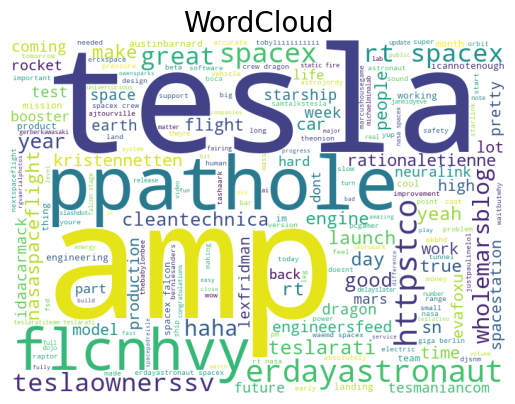

In [51]:
wc = WordCloud(background_color='white', width=700, height=500).generate(txt)

plt.imshow(wc)
plt.axis('off')
plt.title('WordCloud',size = 20)